# CNN on Mnist

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


## Data Normalization
    here we normalize the data using X => (X - Xmin)/(Xmax-Xmin) = X/256

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Building model

## kernel_size 3*3 

### 1. Three Convolution layer with kernel_size 3*3 and  layers  with activation- ReLU and optimizer-Adam

In [0]:
model_1 = Sequential()

# first set of CONV => RELU
model_1.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Third set of CONV => RELU => POOL
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Dropout(0.25))
model_1.add(Flatten())

#Hidden layer 1
model_1.add(Dense(128, activation='relu'))
# Dropout
model_1.add(Dropout(0.5))
#Hidden layer 2
model_1.add(Dense(64,activation='relu'))

#Output layer
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history1=model_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 260s 4ms/step - loss: 0.3053 - acc: 0.9031 - val_loss: 0.0662 - val_acc: 0.9772
Epoch 2/20
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0906 - acc: 0.9733 - val_loss: 0.0389 - val_acc: 0.9876
Epoch 3/20
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0665 - acc: 0.9803 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 4/20
60000/60000 [==============================] - 259s 4ms/step - loss: 0.0546 - acc: 0.9844 - val_loss: 0.0321 - val_acc: 0.9897
Epoch 5/20
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0450 - acc: 0.9868 - val_loss: 0.0256 - val_acc: 0.9912
Epoch 6/20
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0414 - acc: 0.9876 - val_loss: 0.0261 - val_acc: 0.9918
Epoch 7/20
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0356 - acc: 0.9894 - val_loss: 0.0239 - 

10000/10000 [==============================] - 13s 1ms/step
Test error: 0.019698028537289382
Test accuracy: 0.9946


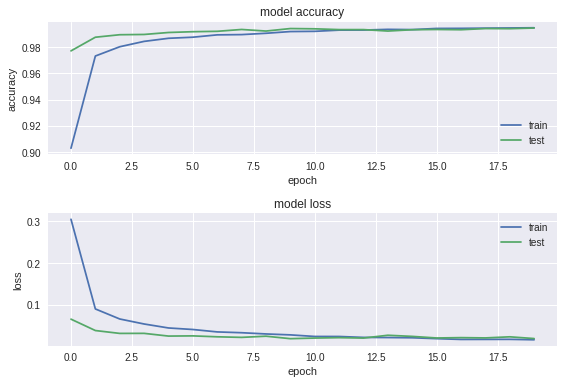

In [0]:


score = model_1.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])


# Credits: https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_1.history.history['acc'])
plt.plot(model_1.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_1.history.history['loss'])
plt.plot(model_1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
#fig

### With 3 hidden layer

In [0]:
model_2 = Sequential()

# first set of CONV => RELU
model_2.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Third set of CONV => RELU => POOL
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Dropout(0.25))
model_2.add(Flatten())


#Hidden layer 1
model_2.add(Dense(256, activation='relu'))
# Dropout
model_2.add(Dropout(0.5))
#Hidden layer 2
model_2.add(Dense(128,activation='relu'))
#Hidden layer 3                 
model_2.add(Dense(64,activation='relu'))
#Output layer
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history2=model_2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 265s 4ms/step - loss: 0.3144 - acc: 0.8964 - val_loss: 0.0492 - val_acc: 0.9848
Epoch 2/20
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0749 - acc: 0.9775 - val_loss: 0.0386 - val_acc: 0.9874
Epoch 3/20
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0539 - acc: 0.9839 - val_loss: 0.0290 - val_acc: 0.9900
Epoch 4/20
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0441 - acc: 0.9872 - val_loss: 0.0253 - val_acc: 0.9916
Epoch 5/20
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0380 - acc: 0.9889 - val_loss: 0.0197 - val_acc: 0.9932
Epoch 6/20
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0325 - acc: 0.9896 - val_loss: 0.0230 - val_acc: 0.9918
Epoch 7/20
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0288 - acc: 0.9916 - val_loss: 0.0172 - 

10000/10000 [==============================] - 13s 1ms/step
Test error: 0.024354995393209948
Test accuracy: 0.9934


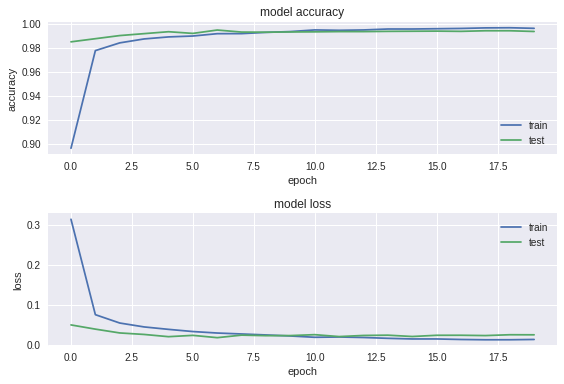

In [0]:
score = model_2.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_2.history.history['acc'])
plt.plot(model_2.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_2.history.history['loss'])
plt.plot(model_2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

### 5 layer

In [0]:
model_3 = Sequential()

# first set of CONV => RELU
model_3.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Third set of CONV => RELU => POOL
model_3.add(Conv2D(128, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Dropout(0.25))
model_3.add(Flatten())


#Hidden layer 1
model_3.add(Dense(512, activation='relu'))
# Dropout
model_3.add(Dropout(0.5))
#Hidden layer 2
model_3.add(Dense(256,activation='relu'))
#Hidden layer 3                 
model_3.add(Dense(128,activation='relu'))
#Hidden layer 4                 
model_3.add(Dense(64,activation='relu'))
#Hidden layer 5                 
model_3.add(Dense(32,activation='relu'))
#Output layer
model_3.add(Dense(num_classes, activation='softmax'))

model_3.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history3=model_3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 285s 5ms/step - loss: 0.3936 - acc: 0.8696 - val_loss: 0.0571 - val_acc: 0.9814
Epoch 2/20
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0692 - acc: 0.9800 - val_loss: 0.0315 - val_acc: 0.9900
Epoch 3/20
60000/60000 [==============================] - 291s 5ms/step - loss: 0.0520 - acc: 0.9849 - val_loss: 0.0332 - val_acc: 0.9895
Epoch 4/20
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0410 - acc: 0.9876 - val_loss: 0.0274 - val_acc: 0.9918
Epoch 5/20
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0347 - acc: 0.9893 - val_loss: 0.0252 - val_acc: 0.9917
Epoch 6/20
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0305 - acc: 0.9912 - val_loss: 0.0241 - val_acc: 0.9922
Epoch 7/20
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0273 - acc: 0.9922 - val_loss: 0.0190 - 

10000/10000 [==============================] - 14s 1ms/step
Test error: 0.025622119065406106
Test accuracy: 0.9934


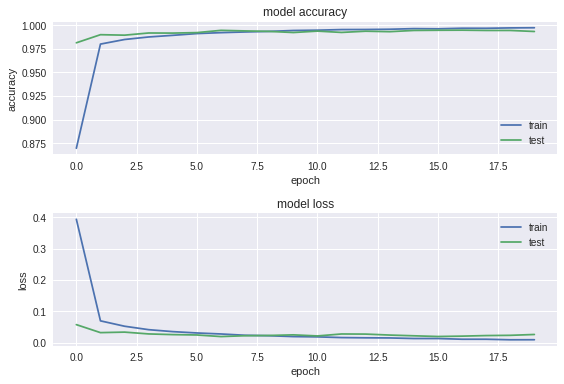

In [0]:
score = model_3.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_3.history.history['acc'])
plt.plot(model_3.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_3.history.history['loss'])
plt.plot(model_3.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

## kernel_size 5*5 

### 1. Three Convolution layer with kernel_size 5*5 and  layers  with activation- ReLU and optimizer-Adam

In [0]:
model_4 = Sequential()

# first set of CONV => RELU
model_4.add(Conv2D(32, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_4.add(Conv2D(64, (5, 5), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Dropout(0.25))
model_4.add(Flatten())

#Hidden layer 1
model_4.add(Dense(128, activation='relu'))
# Dropout
model_4.add(Dropout(0.5))
#Hidden layer 2
model_4.add(Dense(64,activation='relu'))
#Output layer
model_4.add(Dense(num_classes, activation='softmax'))

model_4.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history4=model_4.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 365s 6ms/step - loss: 0.2698 - acc: 0.9155 - val_loss: 0.0482 - val_acc: 0.9840
Epoch 2/20
60000/60000 [==============================] - 367s 6ms/step - loss: 0.0813 - acc: 0.9756 - val_loss: 0.0322 - val_acc: 0.9884
Epoch 3/20
60000/60000 [==============================] - 365s 6ms/step - loss: 0.0595 - acc: 0.9826 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 4/20
60000/60000 [==============================] - 366s 6ms/step - loss: 0.0482 - acc: 0.9856 - val_loss: 0.0279 - val_acc: 0.9901
Epoch 5/20
60000/60000 [==============================] - 364s 6ms/step - loss: 0.0407 - acc: 0.9878 - val_loss: 0.0329 - val_acc: 0.9898
Epoch 6/20
60000/60000 [==============================] - 366s 6ms/step - loss: 0.0383 - acc: 0.9891 - val_loss: 0.0230 - val_acc: 0.9923
Epoch 7/20
60000/60000 [==============================] - 364s 6ms/step - loss: 0.0329 - acc: 0.9901 - val_loss: 0.0218 - 

10000/10000 [==============================] - 18s 2ms/step
Test error: 0.024457520741859844
Test accuracy: 0.9932


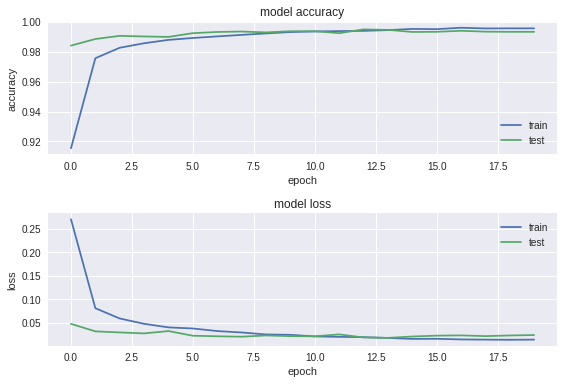

In [0]:
import matplotlib.pyplot as plt

score = model_4.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])


# Credits: https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_4.history.history['acc'])
plt.plot(model_4.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_4.history.history['loss'])
plt.plot(model_4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
#fig

### With 3 hidden layer

In [0]:
model_5 = Sequential()

# first set of CONV => RELU
model_5.add(Conv2D(32, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_5.add(Conv2D(64, (5, 5), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))


model_5.add(Dropout(0.25))
model_5.add(Flatten())


#Hidden layer 1
model_5.add(Dense(256, activation='relu'))
# Dropout
model_5.add(Dropout(0.5))
#Hidden layer 2
model_5.add(Dense(128,activation='relu'))
#Hidden layer 3                 
model_5.add(Dense(64,activation='relu'))
#Output layer
model_5.add(Dense(num_classes, activation='softmax'))

model_5.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history5=model_5.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 396s 7ms/step - loss: 0.2587 - acc: 0.9187 - val_loss: 0.0593 - val_acc: 0.9797
Epoch 2/20
60000/60000 [==============================] - 396s 7ms/step - loss: 0.0699 - acc: 0.9793 - val_loss: 0.0368 - val_acc: 0.9880
Epoch 3/20
60000/60000 [==============================] - 390s 6ms/step - loss: 0.0522 - acc: 0.9845 - val_loss: 0.0303 - val_acc: 0.9899
Epoch 4/20
60000/60000 [==============================] - 390s 7ms/step - loss: 0.0400 - acc: 0.9879 - val_loss: 0.0254 - val_acc: 0.9914
Epoch 5/20
60000/60000 [==============================] - 389s 6ms/step - loss: 0.0350 - acc: 0.9898 - val_loss: 0.0239 - val_acc: 0.9919
Epoch 6/20
60000/60000 [==============================] - 387s 6ms/step - loss: 0.0298 - acc: 0.9906 - val_loss: 0.0252 - val_acc: 0.9917
Epoch 7/20
60000/60000 [==============================] - 386s 6ms/step - loss: 0.0263 - acc: 0.9920 - val_loss: 0.0210 - 

10000/10000 [==============================] - 19s 2ms/step
Test error: 0.025942582759580363
Test accuracy: 0.9949


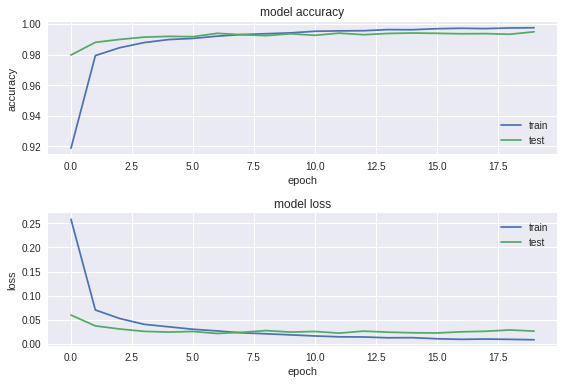

In [0]:

import matplotlib.pyplot as plt

score = model_5.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_5.history.history['acc'])
plt.plot(model_5.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_5.history.history['loss'])
plt.plot(model_5.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

### 5 layer

In [0]:
model_6 = Sequential()

# first set of CONV => RELU
model_6.add(Conv2D(32, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_6.add(Conv2D(64, (5, 5), activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))


model_6.add(Dropout(0.25))
model_6.add(Flatten())


#Hidden layer 1
model_6.add(Dense(512, activation='relu'))
# Dropout
model_6.add(Dropout(0.5))
#Hidden layer 2
model_6.add(Dense(256,activation='relu'))
#Hidden layer 3                 
model_6.add(Dense(128,activation='relu'))
#Hidden layer 4                 
model_6.add(Dense(64,activation='relu'))
#Hidden layer 5                 
model_6.add(Dense(32,activation='relu'))
#Output layer
model_6.add(Dense(num_classes, activation='softmax'))

model_6.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history6=model_6.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 421s 7ms/step - loss: 0.3252 - acc: 0.8964 - val_loss: 0.0520 - val_acc: 0.9850
Epoch 2/20
60000/60000 [==============================] - 421s 7ms/step - loss: 0.0695 - acc: 0.9794 - val_loss: 0.0427 - val_acc: 0.9875
Epoch 3/20
60000/60000 [==============================] - 422s 7ms/step - loss: 0.0500 - acc: 0.9854 - val_loss: 0.0269 - val_acc: 0.9910
Epoch 4/20
60000/60000 [==============================] - 420s 7ms/step - loss: 0.0393 - acc: 0.9888 - val_loss: 0.0296 - val_acc: 0.9909
Epoch 5/20
60000/60000 [==============================] - 417s 7ms/step - loss: 0.0327 - acc: 0.9907 - val_loss: 0.0328 - val_acc: 0.9903
Epoch 6/20
60000/60000 [==============================] - 379s 6ms/step - loss: 0.0281 - acc: 0.9916 - val_loss: 0.0262 - val_acc: 0.9923
Epoch 7/20
60000/60000 [==============================] - 414s 7ms/step - loss: 0.0236 - acc: 0.9935 - val_loss: 0.0263 - 

10000/10000 [==============================] - 20s 2ms/step
Test error: 0.027272584022387945
Test accuracy: 0.9936


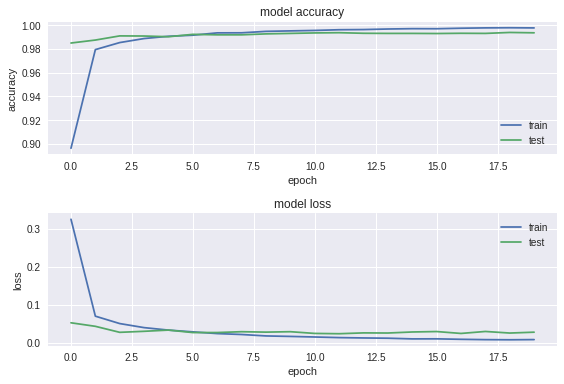

In [0]:
score = model_6.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_6.history.history['acc'])
plt.plot(model_6.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_6.history.history['loss'])
plt.plot(model_6.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

## kernel_size 2*2 

### 1. Three Convolution layer with kernel_size 2*2 and  layers  with activation- ReLU and optimizer-Adam

In [0]:
model_7 = Sequential()

# first set of CONV => RELU => POOL
model_7.add(Conv2D(128, kernel_size=(2,2),padding='same',activation='relu',input_shape=input_shape))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

# second set of CONV => RELU => POOL
model_7.add(Conv2D(64, (2, 2), activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

# Third set of CONV => RELU => POOL
model_7.add(Conv2D(32, (2, 2), activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

model_7.add(Dropout(0.25))
model_7.add(Flatten())

#Hidden layer 1
model_7.add(Dense(128, activation='relu'))
# Dropout
model_7.add(Dropout(0.5))
#Hidden layer 2
model_7.add(Dense(64,activation='relu'))

#Output layer
model_7.add(Dense(num_classes, activation='softmax'))

model_7.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history7=model_7.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 186s 3ms/step - loss: 0.7171 - acc: 0.7596 - val_loss: 0.1759 - val_acc: 0.9450
Epoch 2/20
60000/60000 [==============================] - 185s 3ms/step - loss: 0.2594 - acc: 0.9200 - val_loss: 0.1015 - val_acc: 0.9702
Epoch 3/20
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1933 - acc: 0.9412 - val_loss: 0.0808 - val_acc: 0.9749
Epoch 4/20
60000/60000 [==============================] - 186s 3ms/step - loss: 0.1676 - acc: 0.9488 - val_loss: 0.0664 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 186s 3ms/step - loss: 0.1480 - acc: 0.9557 - val_loss: 0.0632 - val_acc: 0.9804
Epoch 6/20
60000/60000 [==============================] - 186s 3ms/step - loss: 0.1342 - acc: 0.9591 - val_loss: 0.0664 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 189s 3ms/step - loss: 0.1256 - acc: 0.9619 - val_loss: 0.0591 - 

10000/10000 [==============================] - 7s 673us/step
Test error: 0.04430655418855604
Test accuracy: 0.9869


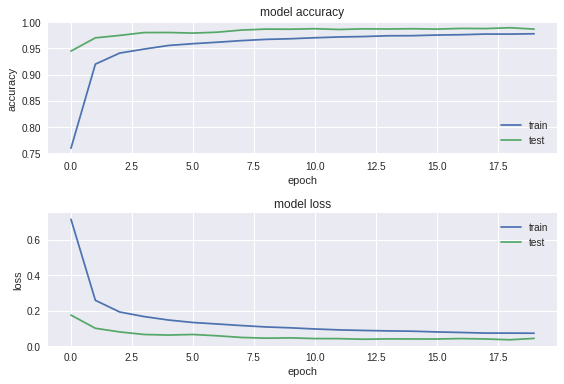

In [0]:
score = model_7.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])


# Credits: https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_7.history.history['acc'])
plt.plot(model_7.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_7.history.history['loss'])
plt.plot(model_7.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
#fig

### With 3 hidden layer

In [0]:
model_8 = Sequential()

# first set of CONV => RELU
model_8.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_8.add(Conv2D(64, (2, 2), activation='relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2)))


model_8.add(Dropout(0.25))
model_8.add(Flatten())


#Hidden layer 1
model_8.add(Dense(256, activation='relu'))
# Dropout
model_8.add(Dropout(0.5))
#Hidden layer 2
model_8.add(Dense(128,activation='relu'))
#Hidden layer 3                 
model_8.add(Dense(64,activation='relu'))
#Output layer
model_8.add(Dense(num_classes, activation='softmax'))

model_8.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history8=model_8.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 172s 3ms/step - loss: 0.3498 - acc: 0.8887 - val_loss: 0.0664 - val_acc: 0.9790
Epoch 2/20
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0983 - acc: 0.9703 - val_loss: 0.0518 - val_acc: 0.9827
Epoch 3/20
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0700 - acc: 0.9785 - val_loss: 0.0410 - val_acc: 0.9861
Epoch 4/20
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0365 - val_acc: 0.9874
Epoch 5/20
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0448 - acc: 0.9858 - val_loss: 0.0458 - val_acc: 0.9859
Epoch 6/20
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0370 - acc: 0.9885 - val_loss: 0.0394 - val_acc: 0.9878
Epoch 7/20
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0323 - acc: 0.9901 - val_loss: 0.0381 - 

10000/10000 [==============================] - 7s 748us/step
Test error: 0.03578541702437269
Test accuracy: 0.9911


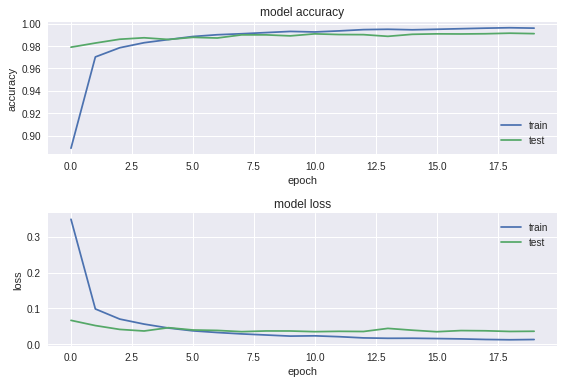

In [0]:
score = model_8.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_8.history.history['acc'])
plt.plot(model_8.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_8.history.history['loss'])
plt.plot(model_8.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

### 5 layer

In [0]:
model_9 = Sequential()

# first set of CONV => RELU
model_9.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_9.add(Conv2D(64, (2, 2), activation='relu'))
model_9.add(MaxPooling2D(pool_size=(2, 2)))

# Third set of CONV => RELU => POOL
model_9.add(Conv2D(128, (2, 2), activation='relu'))
model_9.add(MaxPooling2D(pool_size=(2, 2)))

model_9.add(Dropout(0.25))
model_9.add(Flatten())


#Hidden layer 1
model_9.add(Dense(512, activation='relu'))
# Dropout
model_9.add(Dropout(0.5))
#Hidden layer 2
model_9.add(Dense(256,activation='relu'))
#Hidden layer 3                 
model_9.add(Dense(128,activation='relu'))
#Hidden layer 4                 
model_9.add(Dense(64,activation='relu'))
#Hidden layer 5                 
model_9.add(Dense(32,activation='relu'))
#Output layer
model_9.add(Dense(num_classes, activation='softmax'))

model_9.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history9=model_9.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 209s 3ms/step - loss: 0.4240 - acc: 0.8606 - val_loss: 0.1145 - val_acc: 0.9666
Epoch 2/20
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0811 - acc: 0.9755 - val_loss: 0.0358 - val_acc: 0.9885
Epoch 3/20
60000/60000 [==============================] - 206s 3ms/step - loss: 0.0567 - acc: 0.9826 - val_loss: 0.0323 - val_acc: 0.9893
Epoch 4/20
60000/60000 [==============================] - 208s 3ms/step - loss: 0.0468 - acc: 0.9857 - val_loss: 0.0347 - val_acc: 0.9885
Epoch 5/20
60000/60000 [==============================] - 213s 4ms/step - loss: 0.0402 - acc: 0.9880 - val_loss: 0.0289 - val_acc: 0.9915
Epoch 6/20
60000/60000 [==============================] - 210s 3ms/step - loss: 0.0335 - acc: 0.9898 - val_loss: 0.0261 - val_acc: 0.9917
Epoch 7/20
60000/60000 [==============================] - 210s 4ms/step - loss: 0.0310 - acc: 0.9911 - val_loss: 0.0277 - 

10000/10000 [==============================] - 10s 1ms/step
Test error: 0.019771983769868166
Test accuracy: 0.995


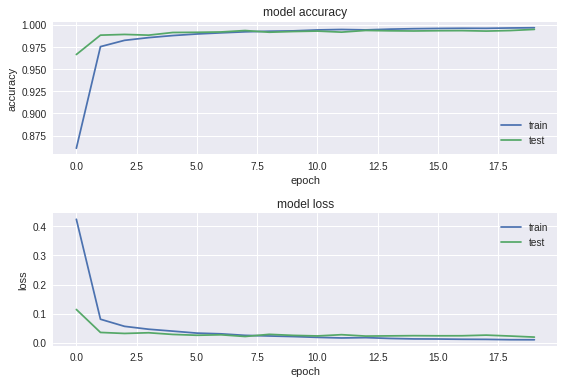

In [0]:
score = model_9.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_9.history.history['acc'])
plt.plot(model_9.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_9.history.history['loss'])
plt.plot(model_9.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

## 2 Hidden Layer

### kernel_size 2* 2

In [4]:
model_10 = Sequential()

# first set of CONV => RELU
model_10.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_10.add(Conv2D(64, (2, 2), activation='relu'))
model_10.add(MaxPooling2D(pool_size=(2, 2)))

model_10.add(Dropout(0.25))
model_10.add(Flatten())


            
#Hidden layer 1                 
model_10.add(Dense(64,activation='relu'))
#Hidden layer 2                 
model_10.add(Dense(32,activation='relu'))
#Output layer
model_10.add(Dense(num_classes, activation='softmax'))

model_10.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history10=model_10.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 122s 2ms/step - loss: 0.2902 - acc: 0.9086 - val_loss: 0.0793 - val_acc: 0.9753
Epoch 2/20
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0748 - acc: 0.9777 - val_loss: 0.0781 - val_acc: 0.9755
Epoch 3/20
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0506 - acc: 0.9849 - val_loss: 0.0483 - val_acc: 0.9835
Epoch 4/20
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0380 - acc: 0.9882 - val_loss: 0.0475 - val_acc: 0.9847
Epoch 5/20
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0297 - acc: 0.9908 - val_loss: 0.0445 - val_acc: 0.9849
Epoch 6/20
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0237 - acc: 0.9925 - val_loss: 0.0438 - val_acc: 0.9853
Epoch 7/20
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0194 - acc: 0.9939 - val_loss: 0.0491 - 

10000/10000 [==============================] - 5s 509us/step
Test error: 0.05367055785792263
Test accuracy: 0.9883


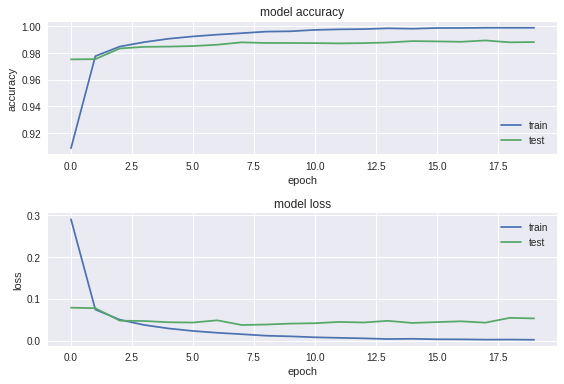

In [5]:
score = model_10.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_10.history.history['acc'])
plt.plot(model_10.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_10.history.history['loss'])
plt.plot(model_10.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

### kernel_size 5 *5

In [6]:
model_11 = Sequential()

# first set of CONV => RELU
model_11.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_11.add(Conv2D(64, (5, 5), activation='relu'))
model_11.add(MaxPooling2D(pool_size=(2, 2)))

model_11.add(Dropout(0.25))
model_11.add(Flatten())


            
#Hidden layer 1                 
model_11.add(Dense(64,activation='relu'))
#Hidden layer 2                 
model_11.add(Dense(32,activation='relu'))
#Output layer
model_11.add(Dense(num_classes, activation='softmax'))

model_11.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history11=model_11.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 129s 2ms/step - loss: 0.2795 - acc: 0.9138 - val_loss: 0.0851 - val_acc: 0.9736
Epoch 2/20
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0732 - acc: 0.9785 - val_loss: 0.0603 - val_acc: 0.9807
Epoch 3/20
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0501 - acc: 0.9849 - val_loss: 0.0462 - val_acc: 0.9850
Epoch 4/20
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0386 - acc: 0.9880 - val_loss: 0.0526 - val_acc: 0.9841
Epoch 5/20
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0298 - acc: 0.9908 - val_loss: 0.0409 - val_acc: 0.9864
Epoch 6/20
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0235 - acc: 0.9922 - val_loss: 0.0467 - val_acc: 0.9864
Epoch 7/20
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0189 - acc: 0.9941 - val_loss: 0.0475 - 

10000/10000 [==============================] - 6s 563us/step
Test error: 0.055056300737153105
Test accuracy: 0.9879


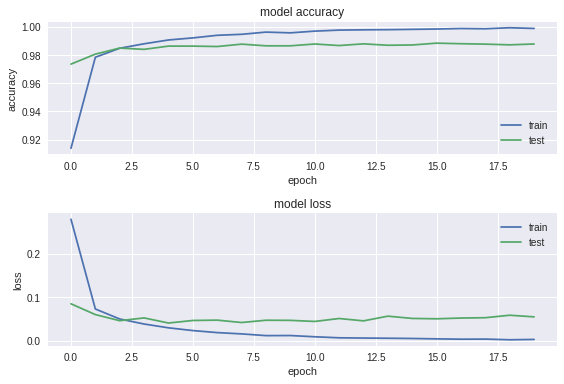

In [7]:
score = model_11.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_11.history.history['acc'])
plt.plot(model_11.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_11.history.history['loss'])
plt.plot(model_11.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

### kernel_size 3*3

In [9]:
model_12 = Sequential()

# first set of CONV => RELU
model_12.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

# second set of CONV => RELU => POOL
model_12.add(Conv2D(64, (3, 3), activation='relu'))
model_12.add(MaxPooling2D(pool_size=(2, 2)))

model_12.add(Dropout(0.25))
model_12.add(Flatten())


            
#Hidden layer 1                 
model_12.add(Dense(64,activation='relu'))
#Hidden layer 2                 
model_12.add(Dense(32,activation='relu'))
#Output layer
model_12.add(Dense(num_classes, activation='softmax'))

model_12.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history11=model_12.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2450 - acc: 0.9231 - val_loss: 0.0543 - val_acc: 0.9820
Epoch 2/20
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0593 - acc: 0.9815 - val_loss: 0.0431 - val_acc: 0.9870
Epoch 3/20
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0397 - acc: 0.9882 - val_loss: 0.0385 - val_acc: 0.9880
Epoch 4/20
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0295 - acc: 0.9911 - val_loss: 0.0455 - val_acc: 0.9860
Epoch 5/20
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0227 - acc: 0.9934 - val_loss: 0.0318 - val_acc: 0.9897
Epoch 6/20
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0177 - acc: 0.9941 - val_loss: 0.0360 - val_acc: 0.9899
Epoch 7/20
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0143 - acc: 0.9954 - val_loss: 0.0319 - 

10000/10000 [==============================] - 7s 727us/step
Test error: 0.045423888562876436
Test accuracy: 0.9905


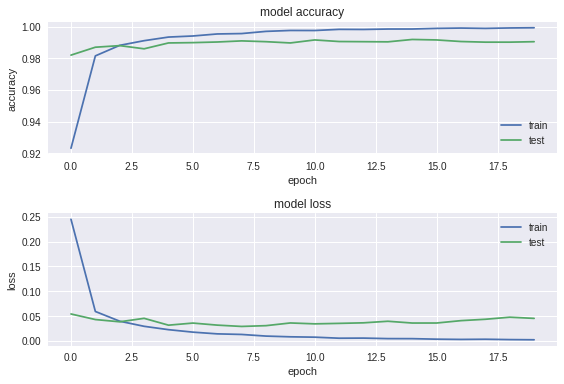

In [10]:
score = model_12.evaluate(x_test, y_test, verbose=1) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_12.history.history['acc'])
plt.plot(model_12.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_12.history.history['loss'])
plt.plot(model_12.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

                                          *    With padding


|kernel_size 3*3 |Test Error| Test Accuracy|
|---------|---------------|-----------------------|------------------------|
|2 Layer|0.01969|0.9946|
|3 Layer|0.02435|0.9934|
|5 Layer|0.02562|0.9934|

|kernel_size 5*5 |Test Error| Test Accuracy|
|---------|---------------|-----------------------|------------------------|
|2 Layer|0.02445|0.9932|
|3 Layer|0.02594|0.9949|
|5 Layer|0.02727|0.9936|

|kernel_size 2*2 |Test Error| Test Accuracy|
|---------|---------------|-----------------------|------------------------|
|2 Layer|0.04430|0.9869|
|3 Layer|0.03578|0.9911|
|5 Layer|0.01977|0.9550|

                                         *    Without padding

| 2layer |Test Error| Test Accuracy|
|---------|---------------|-----------------------|------------------------|
|kernel_size 2*2|0.05367|0.9883|
|kernel_size 3*3|0.04542|0.9905|
|kernel_size 5*5|0.05505|0.9879|

### Conclusion 
    
    * Conv2D with padding perform better than Conv2D without padding.
    * As we increase number of Conv2D layer it may incerse accuracy.
    * As we increase number of layer it may increase accuracy.
    * As we increase number of neurons in layer it may increase accuracy.